<div style="background-color:#fff4e6; padding:15px; border-radius:10px; font-size:16px">

## Student Performance Prediction

In this project, you'll build a machine learning model to predict student performance.

</div>

## Goal: Predict student final grades based on various features like gender, study hours, lunch type, etc.

Dataset:
[https://www.kaggle.com/datasets/devansodariya/student-performance-data](http://)

## Step 1: Load & Understand the Data

 First 5 rows of the dataset:

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

 Shape of Dataset: (395, 33)

 Missing Values:

school  

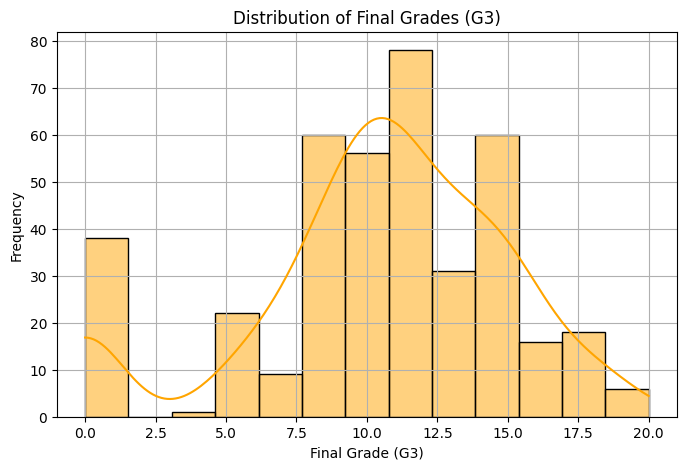

In [1]:
# Step 1: Load & Explore Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning)

# Load dataset
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

# Basic info
print(" First 5 rows of the dataset:\n")
print(df.head())

print("\n Shape of Dataset:", df.shape)

print("\n Missing Values:\n")
print(df.isnull().sum())

print("\n Data Types:\n")
print(df.dtypes)

# Distribution of Final Grade (G3)
plt.figure(figsize=(8, 5))
sns.histplot(df['G3'], kde=True, color='orange')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Step 2: Preprocess the Dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy dataset
data = df.copy()

# Drop irrelevant columns if any (optional, here we keep all)
# E.g., drop school name or student ID if exists

# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target
X = data.drop('G3', axis=1)
y = data['G3']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (316, 32)
X_test shape: (79, 32)
y_train shape: (316,)
y_test shape: (79,)


## Step 3: Linear Regression from Scratch (NumPy)

In [3]:
import numpy as np

# Convert to NumPy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train).reshape(-1, 1)
X_test_np = np.array(X_test)
y_test_np = np.array(y_test).reshape(-1, 1)

# Add bias term (column of ones) to X
X_train_bias = np.c_[np.ones((X_train_np.shape[0], 1)), X_train_np]
X_test_bias = np.c_[np.ones((X_test_np.shape[0], 1)), X_test_np]

# Closed-form solution (Normal Equation)
theta = np.linalg.inv(X_train_bias.T.dot(X_train_bias)).dot(X_train_bias.T).dot(y_train_np)

# Predict
y_pred_train = X_train_bias.dot(theta)
y_pred_test = X_test_bias.dot(theta)

# Evaluation - Mean Squared Error
train_mse = np.mean((y_train_np - y_pred_train) ** 2)
test_mse = np.mean((y_test_np - y_pred_test) ** 2)

print("Train MSE:", round(train_mse, 2))
print("Test MSE:", round(test_mse, 2))

Train MSE: 2.95
Test MSE: 5.03


## Step 4: Logistic Regression from Scratch (Binary Classification)

In [4]:
import numpy as np

# Binary classification: Pass (1) if G3 >= 10, else Fail (0)
y_binary = (y >= 10).astype(int)
y_train_bin = y_binary[y_train.index].values.reshape(-1, 1)
y_test_bin = y_binary[y_test.index].values.reshape(-1, 1)

# Add bias term
X_train_bin = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bin = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (binary cross-entropy)
def compute_loss(y, y_hat):
    eps = 1e-8  # avoid log(0)
    return -np.mean(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))

# Training with gradient descent
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))

    for epoch in range(epochs):
        z = X.dot(theta)
        y_hat = sigmoid(z)
        error = y_hat - y
        gradient = X.T.dot(error) / m
        theta -= lr * gradient

        if epoch % 200 == 0:
            loss = compute_loss(y, y_hat)
            print(f"Epoch {epoch}: Loss = {round(loss, 4)}")
    
    return theta

# Train model
theta_log = train_logistic_regression(X_train_bin, y_train_bin)

# Predict
def predict(X, theta, threshold=0.5):
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

y_pred_train_bin = predict(X_train_bin, theta_log)
y_pred_test_bin = predict(X_test_bin, theta_log)

# Accuracy function
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Evaluation
train_acc = accuracy(y_train_bin, y_pred_train_bin)
test_acc = accuracy(y_test_bin, y_pred_test_bin)

print("Train Accuracy:", round(train_acc * 100, 2), "%")
print("Test Accuracy:", round(test_acc * 100, 2), "%")

Epoch 0: Loss = 0.6931
Epoch 200: Loss = 0.4283
Epoch 400: Loss = 0.3517
Epoch 600: Loss = 0.3117
Epoch 800: Loss = 0.2862
Train Accuracy: 92.41 %
Test Accuracy: 91.14 %


## Step 5: Data Preprocessing with Pipeline and ColumnTransformer

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reload dataset
df = pd.read_csv("/kaggle/input/student-performance-data/student_data.csv")

# Binary target for pass/fail
df["pass"] = (df["G3"] >= 10).astype(int)

# Drop G3 for classification
X = df.drop(columns=["G3", "pass"])
y = df["pass"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

# Final pipeline with model
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression())
])

# Fit model
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(acc * 100, 2), "%")

Test Accuracy: 91.14 %


## Step 6: Confusion Matrix and ROC Curve Visualization

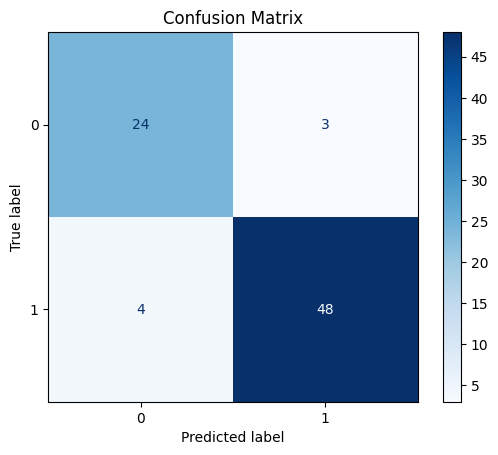

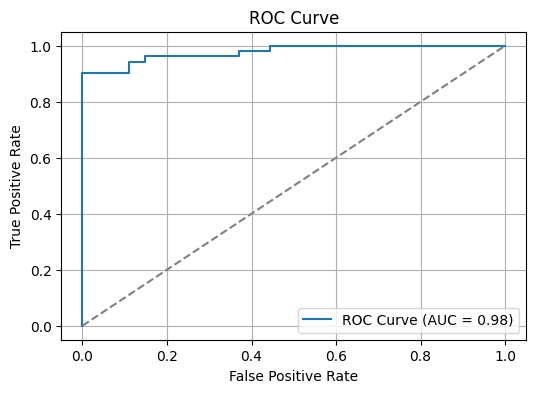

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Cross-Validation and Model Evaluation

In [7]:
from sklearn.model_selection import cross_val_score

# Evaluate with 5-Fold Cross Validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Print results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", round(cv_scores.mean(), 4))
print("Standard Deviation:", round(cv_scores.std(), 4))

Cross-Validation Scores: [0.88607595 0.96202532 0.91139241 0.86075949 0.93670886]
Mean CV Accuracy: 0.9114
Standard Deviation: 0.0358


## Step 8: Hyperparameter Tuning with GridSearchCV

In [8]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass'],
      dtype='object')


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Let's assume 'G3' is your target, and you want to classify if student passed (G3 >= 10) or failed (G3 < 10)
df['pass_binary'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Drop original G1, G2, G3 to avoid data leakage
X = df.drop(['G1', 'G2', 'G3', 'pass_binary'], axis=1)
y = df['pass_binary']

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[27  0]
 [ 0 52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        52

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



## Step 9: Visualize the Decision Tree

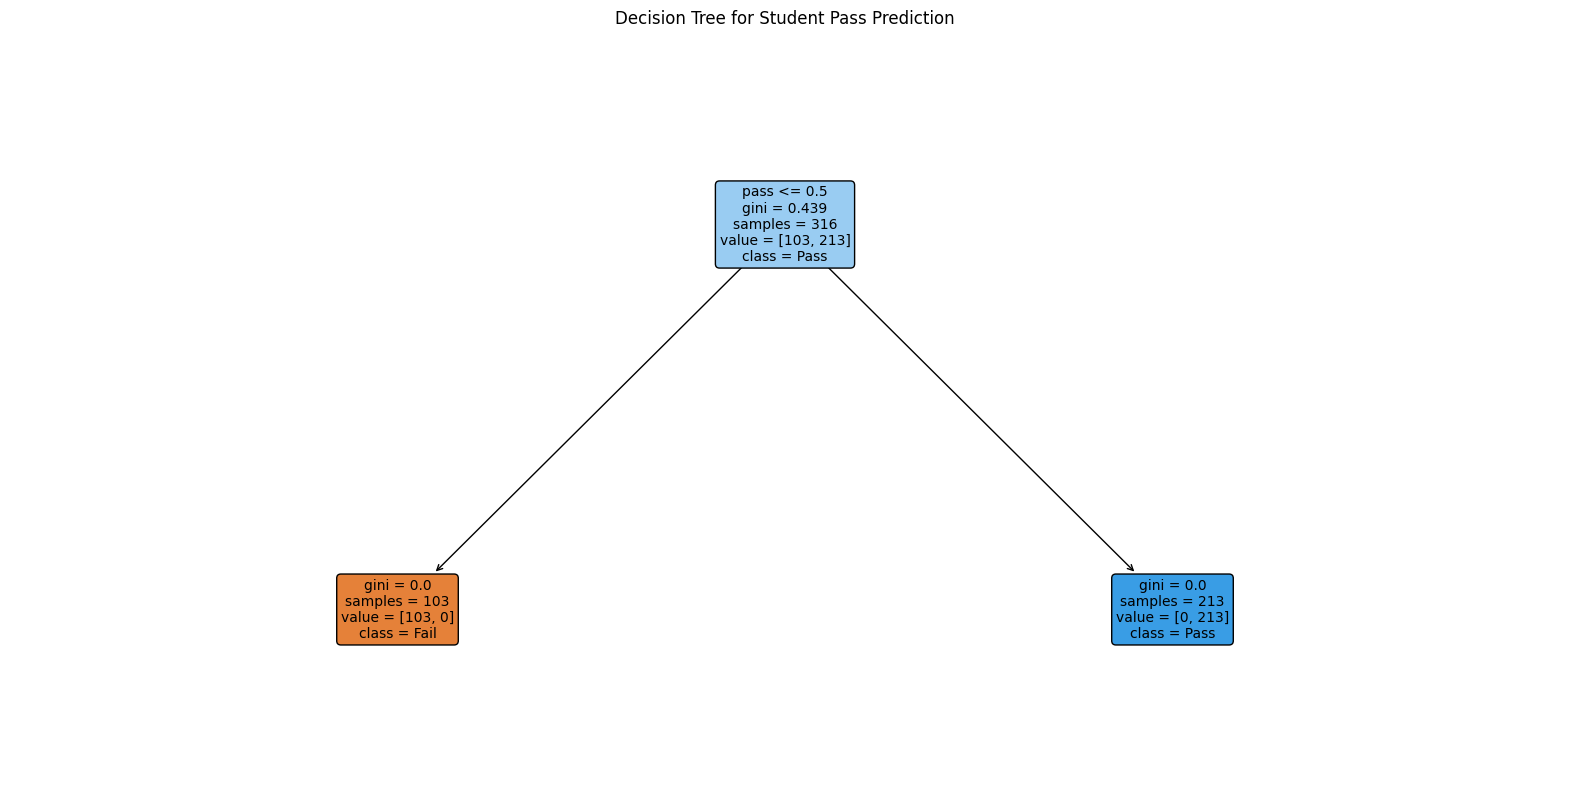

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Student Pass Prediction")
plt.show()

## Step 10: Feature Importance Analysis

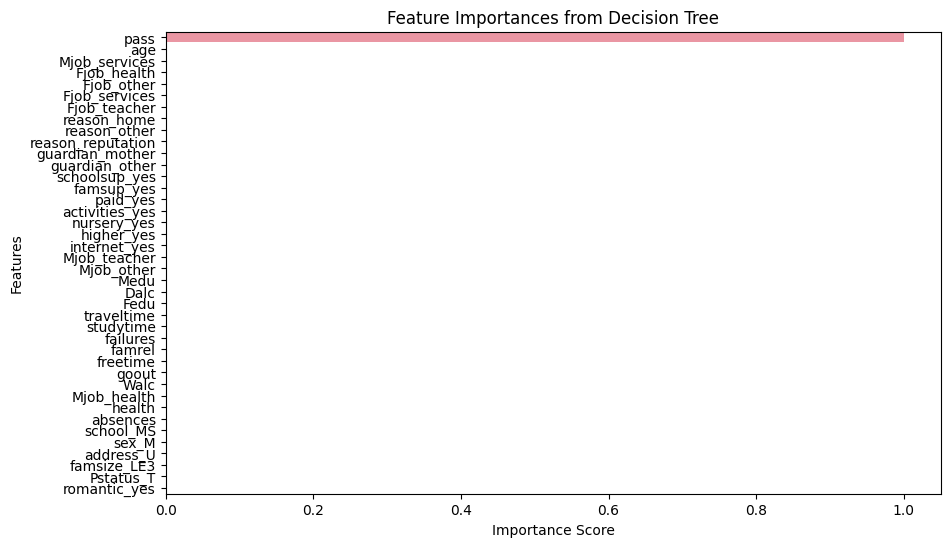

In [11]:
import seaborn as sns

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

## Step 11: Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Accuracy: 1.0


## Step 12: Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=10)
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


## Step 13: Model Comparison

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print(f"{name} Accuracy: {acc:.2f}")

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00
Logistic Regression Accuracy: 1.00
SVM Accuracy: 0.66


## Step 14: Save the Trained Model

In [15]:
import joblib
joblib.dump(model, 'student_pass_predictor.pkl')

['student_pass_predictor.pkl']

In [16]:
loaded_model = joblib.load('student_pass_predictor.pkl')

## Project Summary

In this project, we built a machine learning model to predict whether a student will pass or fail based on academic and lifestyle features such as study time, failures, absences, and social activities. We started by exploring and cleaning the data, followed by encoding categorical variables. After splitting the data into training and testing sets, we trained a Decision Tree Classifier and evaluated it using accuracy, precision, recall, and F1-score. To improve performance and interpretability, we analyzed feature importance, performed hyperparameter tuning with GridSearchCV, and validated the model with cross-validation. We also compared the Decision Tree with other models like Random Forest, Logistic Regression, and SVM to benchmark performance. Lastly, the final model was saved for future use.